# Méca & python

## Sans utiliser les notation numpy
Plus proche du python "normal" / cohérence avec info 2nde

In [1]:
# Chargement des librairies utiles
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

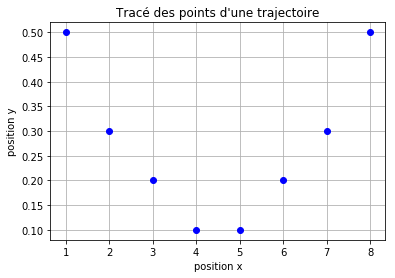

In [2]:
# Tracé des points d'une trajectoire
# Méthode 1 : tableaux X et Y
X = [1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  ]
Y = [0.5, 0.3, 0.2, 0.1, 0.1, 0.2, 0.3, 0.5]
plt.plot(X, Y, "bo", label="Trajectoire")
plt.title("Tracé des points d'une trajectoire")
plt.xlabel("position x")
plt.ylabel("position y")
plt.grid()
plt.show()

[[-0.223951998822, 1.76458242983, 0.24], [-0.343580601208, 1.97872907661, 0.28], [-0.51009038223, 2.22294809106, 0.32], [-0.707225408616, 2.45118719902, 0.36], [-0.904090917691, 2.66398567058, 0.4], [-1.06952262947, 2.84644213942, 0.44], [-1.26584910392, 3.02835933818, 0.48], [-1.46177130241, 3.18711558233, 0.52], [-1.61175563285, 3.36984168622, 0.56], [-1.78383296605, 3.49040079194, 0.6], [-1.97894661261, 3.60283512689, 0.64], [-2.17352122454, 3.68438818904, 0.68], [-2.35318748976, 3.79709215904, 0.72], [-2.53150616842, 3.83259294703, 0.76], [-2.71835708968, 3.91428082671, 0.8], [-2.8809588697, 3.93461061335, 0.84], [-3.06740551499, 3.99313753842, 0.88], [-3.24478088307, 3.97459609901, 0.92], [-3.42283004442, 3.9946562506, 0.96], [-3.60792910316, 3.97597999367, 1.0], [-3.78490019527, 3.93427759966, 1.04], [-3.97731866872, 3.8923055706, 1.08], [-4.13111868882, 3.85100762916, 1.12], [-4.2990185037, 3.73223687067, 1.16]]


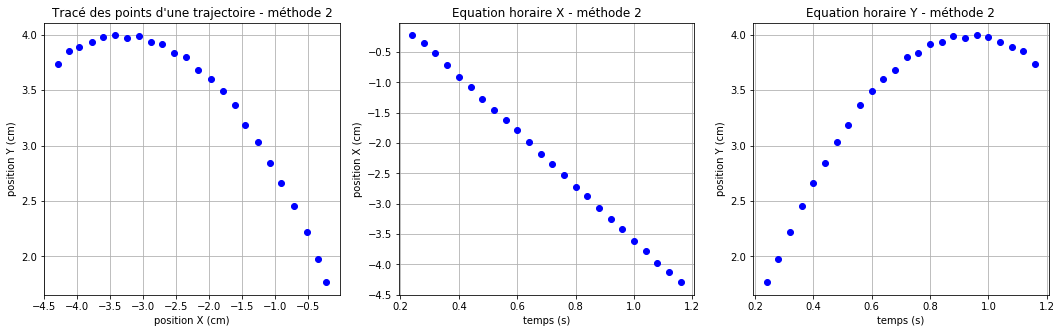

In [3]:
# Tracé des points d'une trajectoire
# Méthode 2 : tableau de points (x, y, t)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import csv
virgule=","
separateur=";"
entete = True


def charge_csv(filename):
    points = []
    line = 0
    with open("./parabole 2.csv") as csvfile:
        csvr = csv.reader(csvfile, delimiter=separateur, quotechar='"')
        for row in csvr:
            if entete and line == 0:
                line = 1
                continue

            points.append([
                float(row[1].replace(virgule,'.')),
                float(row[2].replace(virgule,'.')),
                float(row[0].replace(virgule,'.'))])
    return points

points = charge_csv("./test.csv")
print(points)
plt.figure(1, figsize=(18,5))
plt.subplot(1,3,1)
plt.plot([p[0] for p in points],
         [p[1] for p in points],
         "bo", label="Trajectoire")
plt.title("Tracé des points d'une trajectoire - méthode 2")
plt.xlabel("position X (cm)")
plt.ylabel("position Y (cm)")
plt.grid()

plt.subplot(1,3,2)
plt.plot([p[2] for p in points],
         [p[0] for p in points], 
         "bo", label="Trajectoire")
plt.title("Equation horaire X - méthode 2")
plt.xlabel("temps (s)")
plt.ylabel("position X (cm)")
plt.grid()

plt.subplot(1,3,3)
plt.plot([p[2] for p in points],
         [p[1] for p in points],
         "bo", label="Equation horaire Y")
plt.title("Equation horaire Y - méthode 2")
plt.xlabel("temps (s)")
plt.ylabel("position Y (cm)")
plt.grid()

plt.show()

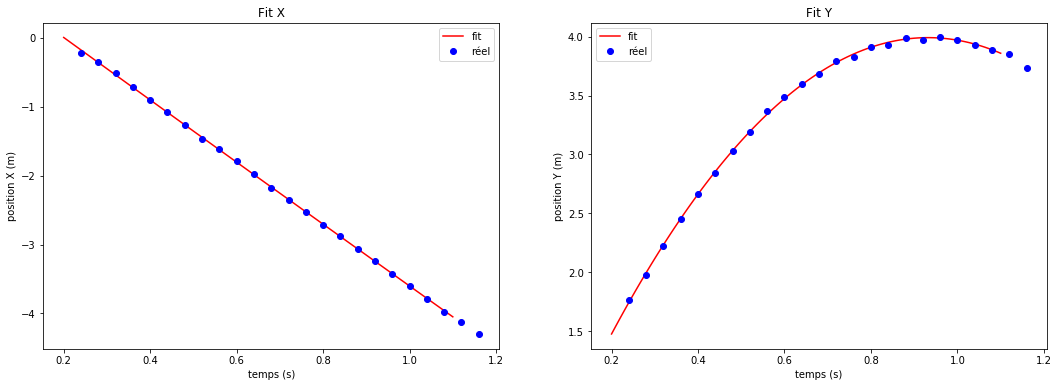

In [4]:
# Fit de la trajectoire

t = np.linspace(0.2,1.1, 100)

# Fit x
a1, b1, c1 = np.polyfit([p[2] for p in points],
                        [p[0] for p in points], 
                        deg=2, full=False)
def x(t):
    return a1*t**2+b1*t+c1

plt.figure(1, figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(t, x(t), "r-", label="fit")
plt.plot([p[2] for p in points],
         [p[0] for p in points],
         "bo", label="réel")
plt.title("Fit X")
plt.xlabel("temps (s)")
plt.ylabel("position X (m)")
plt.legend()

# Fit y
a2, b2, c2 = np.polyfit([p[2] for p in points],
                        [p[1] for p in points],
                        deg=2, full=False)
def y(t):
    return a2*t**2+b2*t+c2

plt.subplot(1,2,2)
plt.plot(t, y(t), "r-", label="fit")
plt.plot([p[2] for p in points],
         [p[1] for p in points],
         "bo", label="réel")
plt.title("Fit Y")
plt.xlabel("temps (s)")
plt.ylabel("position Y (m)")
plt.legend()

plt.show()


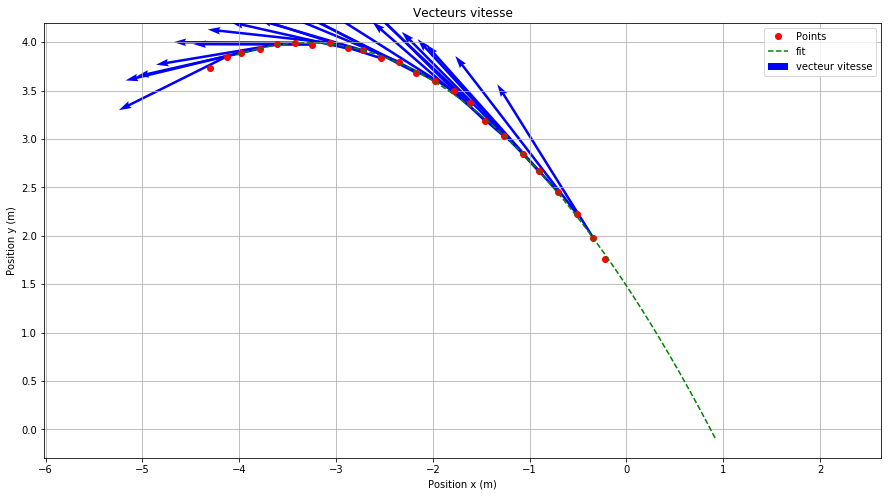

In [5]:
# Tracé des vecteurs vitesse

t = np.linspace(0, 1.1, 100)

def v_x(points, i):
    return (points[i+1][0]-points[i-1][0])/2*0.08
def v_y(points, i):
    return (points[i+1][1]-points[i-1][1])/2*0.08

# Calcul vecteurs
vec = []
for i, pt in enumerate(points):
    if i == 0:
        continue
    if i >= len(points)-1:
        break
    vec.append([pt[0], pt[1],
                v_x(points, i), v_y(points, i)])

# Plot vecteurs
plt.figure(1, figsize=(15,8))
plt.subplot(1,1,1)
plt.quiver([p[0] for p in vec],
           [p[1] for p in vec],
           [p[2] for p in vec],
           [p[3] for p in vec],
           scale=0.1, color="b",
           width=0.003,label="vecteur vitesse")

# Plot points
plt.plot([p[0] for p in points],
         [p[1] for p in points],
         "ro", label="Points")
plt.axis('equal')


# Plot fit
a1, b1, c1 = np.polyfit([p[2] for p in points],
                        [p[0] for p in points],
                        deg=2, full=False)
def x(t):
    return a1*t**2+b1*t+c1

a2, b2, c2 = np.polyfit([p[2] for p in points],
                        [p[1] for p in points],
                        deg=2, full=False)
def y(t):
    return a2*t**2+b2*t+c2

plt.plot(x(t), y(t), "g--", label="fit")

# Paramètres plot
plt.grid()
plt.legend()
plt.title("Vecteurs vitesse")
plt.xlabel("Position x (m)")
plt.ylabel("Position y (m)")
plt.show()
   

## En utilisant numpy
Plus proche du python "normal" / cohérence avec info 2nde

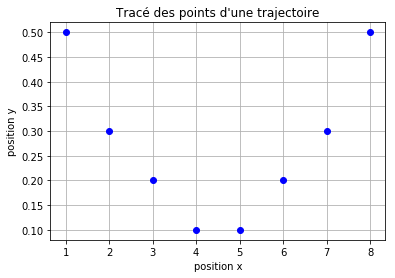

In [6]:
# Tracé des points d'une trajectoire
# Méthode 1 : tableaux X et Y
pts = np.array([[1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  ],
                [0.5, 0.3, 0.2, 0.1, 0.1, 0.2, 0.3, 0.5]])
plt.plot(pts[0,:], pts[1,:], "bo", label="Trajectoire")
plt.title("Tracé des points d'une trajectoire")
plt.xlabel("position x")
plt.ylabel("position y")
plt.grid()
plt.show()

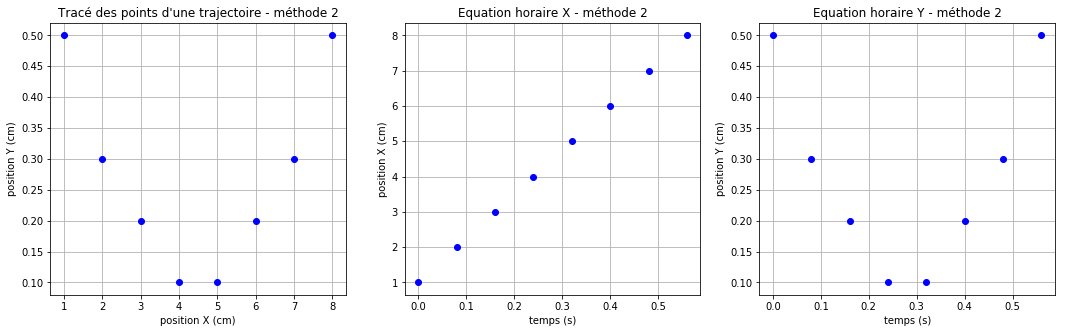

In [7]:
# Tracé des points d'une trajectoire
# Méthode 2 : tableau de points (x, y, t)
points = np.array([
    (1, 0.5, 0.08*0),
    (2, 0.3, 0.08*1),
    (3, 0.2, 0.08*2),
    (4, 0.1, 0.08*3),
    (5, 0.1, 0.08*4),
    (6, 0.2, 0.08*5),
    (7, 0.3, 0.08*6),
    (8, 0.5, 0.08*7)
    
])
plt.figure(1, figsize=(18,5))
plt.subplot(1,3,1)
plt.plot(points[:,0], points[:,1],
         "bo", label="Trajectoire")
plt.title("Tracé des points d'une trajectoire - méthode 2")
plt.xlabel("position X (cm)")
plt.ylabel("position Y (cm)")
plt.grid()

plt.subplot(1,3,2)
plt.plot(points[:,2], points[:,0], 
         "bo", label="Trajectoire")
plt.title("Equation horaire X - méthode 2")
plt.xlabel("temps (s)")
plt.ylabel("position X (cm)")
plt.grid()

plt.subplot(1,3,3)
plt.plot(points[:,2], points[:,1],
         "bo", label="Equation horaire Y")
plt.title("Equation horaire Y - méthode 2")
plt.xlabel("temps (s)")
plt.ylabel("position Y (cm)")
plt.grid()

plt.show()

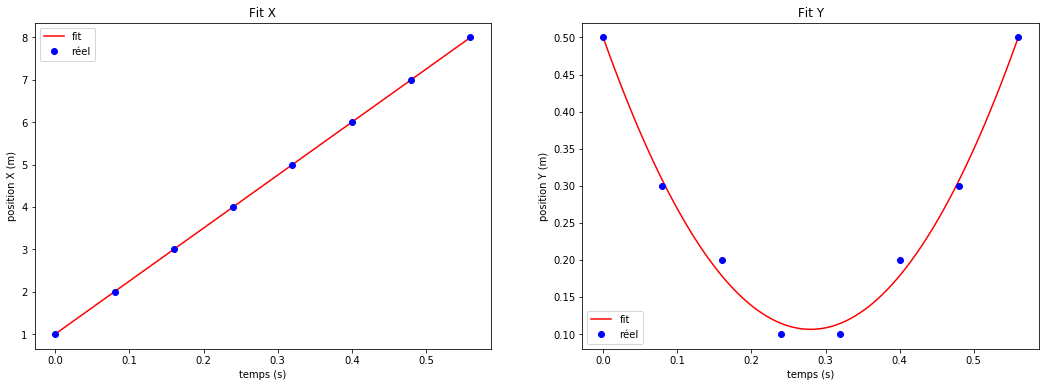

In [8]:
# Fit de la trajectoire
points = np.array([
    (1, 0.5, 0.08*0),
    (2, 0.3, 0.08*1),
    (3, 0.2, 0.08*2),
    (4, 0.1, 0.08*3),
    (5, 0.1, 0.08*4),
    (6, 0.2, 0.08*5),
    (7, 0.3, 0.08*6),
    (8, 0.5, 0.08*7)   
])
t = np.linspace(0,0.08*7, 100)

# Fit x
a1, b1, c1 = np.polyfit(points[:,2],points[:,0], 
                        deg=2, full=False)
def x(t):
    return a1*t**2+b1*t+c1

plt.figure(1, figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(t, x(t), "r-", label="fit")
plt.plot(points[:,2],points[:,0],
         "bo", label="réel")
plt.title("Fit X")
plt.xlabel("temps (s)")
plt.ylabel("position X (m)")
plt.legend()

# Fit y
a2, b2, c2 = np.polyfit(points[:,2],points[:,1],
                        deg=2, full=False)
def y(t):
    return a2*t**2+b2*t+c2

plt.subplot(1,2,2)
plt.plot(t, y(t), "r-", label="fit")
plt.plot(points[:,2],points[:,1],
         "bo", label="réel")
plt.title("Fit Y")
plt.xlabel("temps (s)")
plt.ylabel("position Y (m)")
plt.legend()

plt.show()

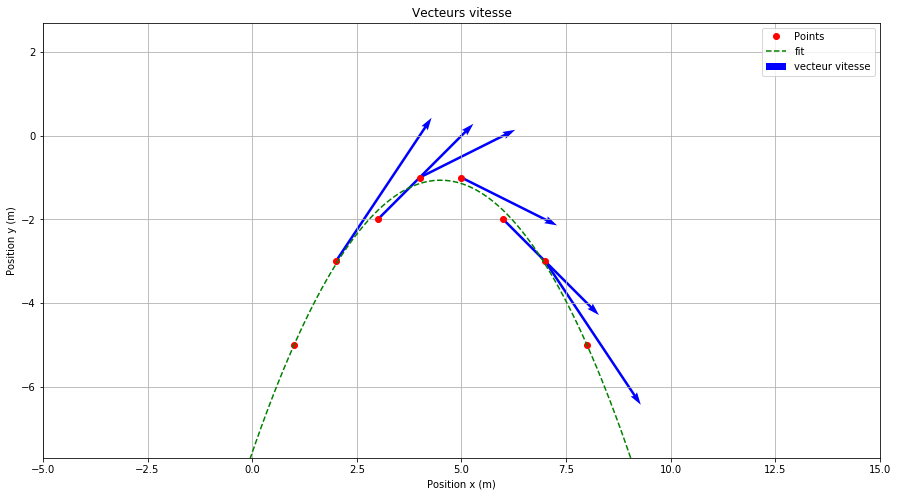

In [11]:
# Tracé des vecteurs vitesse
points = np.array([
    (1, -5, 0.08*0),
    (2, -3, 0.08*1),
    (3, -2, 0.08*2),
    (4, -1, 0.08*3),
    (5, -1, 0.08*4),
    (6, -2, 0.08*5),
    (7, -3, 0.08*6),
    (8, -5, 0.08*7)   
])
t = np.linspace(-0.08*2,0.08*9, 100)

def v_x(points, i):
    return (points[i+1][0]-points[i-1][0])/2*0.08
def v_y(points, i):
    return (points[i+1][1]-points[i-1][1])/2*0.08

# Calcul vecteurs
vec =[]
for i, pt in enumerate(points):
    if i == 0:
        continue
    if i >= len(points)-1:
        break
    vec.append([pt[0], pt[1],
                v_x(points, i), v_y(points, i)])
vec = np.array(vec)
# Plot vecteurs
plt.figure(1, figsize=(15,8))
plt.subplot(1,1,1)
plt.quiver(vec[:,0], vec[:,1], vec[:,2], vec[:,3],
           scale=0.7, color="b",
           width=0.003,label="vecteur vitesse")

# Plot points
plt.plot(points[:,0], points[:,1],
         "ro", label="Points")
plt.axis('equal')


# Plot fit
a1, b1, c1 = np.polyfit(points[:,2], points[:,0],
                        deg=2, full=False)
def x(t):
    return a1*t**2+b1*t+c1

a2, b2, c2 = np.polyfit(points[:,2], points[:,1],
                        deg=2, full=False)
def y(t):
    return a2*t**2+b2*t+c2

plt.plot(x(t), y(t), "g--", label="fit")

# Paramètres plot
plt.ylim(top=5, bottom=-10)
plt.xlim(left=-5, right=15)
plt.grid()
plt.legend()
plt.title("Vecteurs vitesse")
plt.xlabel("Position x (m)")
plt.ylabel("Position y (m)")
plt.show()